# OLA 3 - Unsupervised learning

For this assignment we have used the UK traffic accident dataset from [Kaggle](https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles).
<br><br>
We will be investigating the relationship between accidents and drivers age, vehicles age, and time of the accident. We will be using the Kmeans clustering algorithm.

In [1]:
%pip install plotly
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install seaborn
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data wrangling:

In [3]:
def wrangle_data_ola3():
    # The datasets 'Accident_Information.csv' and 'Vehicle_Information.csv' are too big for github, so they will have to be manually downloaded from Kaggle.
    acc_data = pd.read_csv('../Data/traffic_data/Accident_Information.csv', dtype={0: str}, encoding='latin1')
    veh_data = pd.read_csv('../Data/traffic_data/Vehicle_Information.csv', dtype={0: str}, encoding='latin1')

    merged_data = pd.merge(acc_data, veh_data, on='Accident_Index')

    data_cut = pd.DataFrame(merged_data[
        ['Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit', 'Time',
         'Age_Band_of_Driver', 'Age_of_Vehicle', 'Engine_Capacity_.CC.']])

    data_cut.replace('Data missing or out of range', np.nan, inplace=True)
    data_cut_cleaned = data_cut.dropna(how='any').copy()

    # Ensure the 'time' column is treated as strings and convert to minutes past midnight
    data_cut_cleaned['Time'] = data_cut_cleaned['Time'].astype(str).apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

    # Midpoint Conversion for the 'Age_Band_of_Driver'
    data_cut_cleaned['Age_Band_of_Driver'] = data_cut_cleaned['Age_Band_of_Driver'].replace('Over 75', '80')
    data_cut_cleaned['Age_Band_of_Driver'] = data_cut_cleaned['Age_Band_of_Driver'].apply(calculate_midpoint)

    data_cut_cleaned.to_csv('../Data/traffic_data/cleaned_data_ola3.csv', index=False)


def calculate_midpoint(range_str):
    if ' - ' in range_str:
        # It's a range, calculate the midpoint
        lower, upper = map(int, range_str.split(' - '))
        return (lower + upper) / 2
    else:
        # It's a single value (e.g., "80" for "Over 75"), directly convert to int
        return int(range_str)

## Data preprocessing:

In [4]:
def preprocess_ola3():
    data_df = pd.read_csv('../Data/traffic_data/cleaned_data_ola3.csv')
    data_df = data_df[['Time', 'Age_Band_of_Driver', 'Age_of_Vehicle']]
    
    # Scale the data
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data_df)
    
    columns = data_df.columns
    scaled_features_df = pd.DataFrame(scaled_features, columns=columns)

    # # Apply PCA
    # pca = PCA(n_components=2)  # For example, reduce to 2 dimensions for visualization
    # pca_result = pca.fit_transform(scaled_features_df)

    # # Convert PCA result to DataFrame for easy use
    # pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

    # save the encoded data
    scaled_features_df.to_csv('../Data/traffic_data/scaled_data_ola3.csv', index=False)
    return scaled_features_df

In [5]:
# sns.pairplot(preprocess_ola3())

In [6]:
def plot_3d(data, col_name_1, col_name_2, col_name_3):
    df = data[[col_name_1, col_name_2, col_name_3]].sample(n=1000)

    fig = px.scatter_3d(df, x=col_name_1, y=col_name_2, z=col_name_3,
                        title='3D Scatter Plot of DataFrame Features')
    fig.update_layout(scene=dict(
        xaxis_title=df.columns[0],
        yaxis_title=df.columns[1],
        zaxis_title=df.columns[2]),
        margin=dict(r=0, b=0, l=0, t=30))
    fig.show()

In [7]:
# plot_3d(pd.read_csv('../Data/traffic_data/scaled_data_ola3.csv'), 'Time', 'Age_of_Vehicle', 'Age_Band_of_Driver')

## Elbow plot:

In [8]:
def elbow_plot():
    pca_data = pd.read_csv('../Data/traffic_data/scaled_data_ola3.csv')

    sse = []
    for k in range(1, 21):  # Test values of k from 1 to 20
        print("Number of clusters: ", k)
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(pca_data)
        sse.append(kmeans.inertia_)  # SSE to closest centroid

    plt.plot(range(1, 21), sse, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.show()

In [9]:
# elbow_plot()

Based on the result of the elbow-plot, we can conclude that the optimal amount of clusters is somewhere between 6 and 8.

## Clustering:

In [10]:
def kmeans_cluster():
    data = pd.read_csv('../Data/traffic_data/scaled_data_ola3.csv')

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=7, random_state=42)
    clusters = kmeans.fit_predict(data)

    # Assign the cluster centers
    data['Cluster'] = kmeans.labels_
    
    # sns.pairplot(data, hue='Cluster', palette='viridis', diag_kind='kde')

    # # Show plot
    # sns.plt.show()
    data.to_csv('../Data/traffic_data/clustered_data_ola3.csv', index=False)

In [11]:
kmeans_cluster()

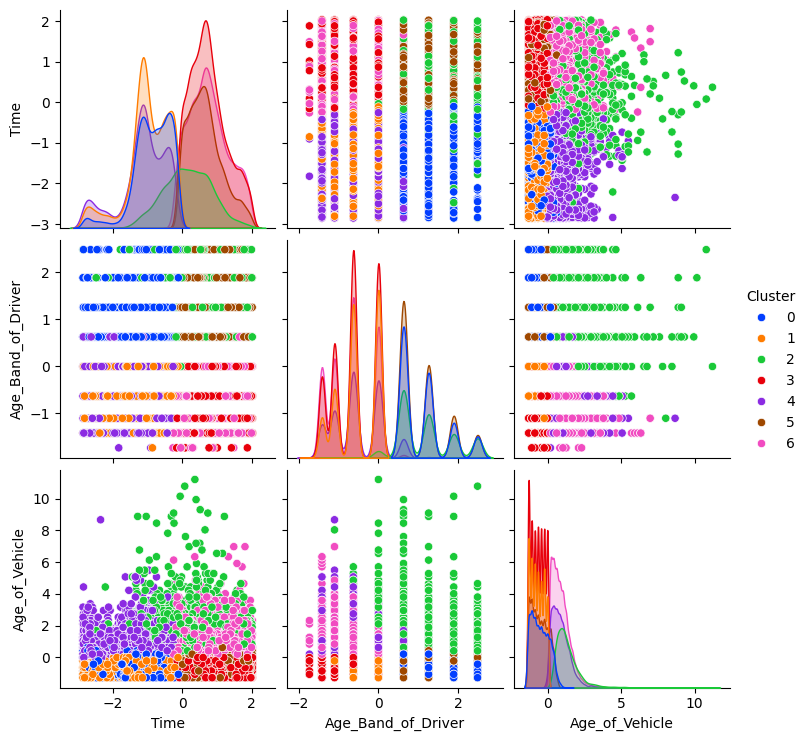

In [17]:
df = pd.read_csv('../Data/traffic_data/clustered_data_ola3.csv')
data = df.sample(n=50000)

sns.pairplot(data, hue='Cluster', palette='bright')

From our investigation, we can conclude that there is no obvious correlation between the age of the vehicle and the number of accidents.
<br>
We can also conclude that the majority of accidents happen somewhere between a couple of hours after and before midnight.